In [6]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression



In [7]:
df=pd.read_csv("heart_disease_uci(1).csv")

In [8]:
df.shape

(920, 16)

In [9]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [13]:
print("Data types:\n",df.dtypes)

Data types:
 id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


In [14]:
pd.set_option('future.no_silent_downcasting',True)

mean_colunms=['trestbps','chol','thalch','oldpeak','ca']
mode_columns=['fbs','restecg','exang','slope','thal']

for col in mean_colunms:
    if col in df.columns:
        df[col]= df[col].fillna(df[col].mean())

for col in mode_columns:
    if col in df.columns:
        df[col]=df[col].fillna(df[col].mode()[0])


df=df.infer_objects(copy=False)

print(df.isnull().sum())



id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [15]:
df["hospital_id"]= np.random.randint(100,105, size=len(df))

In [16]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,hospital_id
0,1,63,Male,Cleveland,typical angina,145.000000,233.0,True,lv hypertrophy,150.000000,False,2.300000,downsloping,0.000000,fixed defect,0,102
1,2,67,Male,Cleveland,asymptomatic,160.000000,286.0,False,lv hypertrophy,108.000000,True,1.500000,flat,3.000000,normal,2,104
2,3,67,Male,Cleveland,asymptomatic,120.000000,229.0,False,lv hypertrophy,129.000000,True,2.600000,flat,2.000000,reversable defect,1,101
3,4,37,Male,Cleveland,non-anginal,130.000000,250.0,False,normal,187.000000,False,3.500000,downsloping,0.000000,normal,0,100
4,5,41,Female,Cleveland,atypical angina,130.000000,204.0,False,lv hypertrophy,172.000000,False,1.400000,upsloping,0.000000,normal,0,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,flat,0.676375,normal,1,103
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,False,0.878788,flat,0.676375,normal,0,100
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,flat,0.676375,fixed defect,2,101
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,False,0.878788,flat,0.676375,normal,0,101


In [17]:
df1 =df[['age','cp','chol','thalch']]
df2=df[['exang','slope','num']]

merged_df=pd.concat([df1,df2], axis=1)

print("Shape of merged dataframe:",merged_df.shape)
print("Columns:",merged_df.columns.tolist())


Shape of merged dataframe: (920, 7)
Columns: ['age', 'cp', 'chol', 'thalch', 'exang', 'slope', 'num']


In [18]:
def mark_outliers(column):
    if column.dtype.kind in 'iufc':
        Q1= column.quantile(0.25)
        Q3= column.quantile(0.75)
        IQR = Q3 - Q1
        threshold=1.5 * IQR
        outlier_mask= (column< Q1 - threshold) | (column > Q3 - threshold)
        return column.where(outlier_mask)
    else:
        return column

numeric_columns=['age','trestbps','chol','thalch','oldpeak','ca']

for col in numeric_columns:
    if col in df.columns:
        df[f'{col}_outliers']=mark_outliers(df[col])

outlier_columns=[f'{col}_outliers' for col in numeric_columns]

outliers_df=df[outlier_columns].dropna(how='all')

print("Rows with outliers:")
print(outliers_df)
        

Rows with outliers:
     age_outliers  trestbps_outliers  chol_outliers  thalch_outliers  \
0            63.0         145.000000          233.0       150.000000   
1            67.0         160.000000          286.0       108.000000   
2            67.0         120.000000          229.0       129.000000   
3             NaN         130.000000          250.0       187.000000   
4            41.0         130.000000          204.0       172.000000   
..            ...                ...            ...              ...   
915          54.0         127.000000          333.0       154.000000   
916          62.0         132.132404          139.0       137.545665   
917          55.0         122.000000          223.0              NaN   
918          58.0         132.132404          385.0       137.545665   
919          62.0         120.000000          254.0              NaN   

     oldpeak_outliers  ca_outliers  
0            2.300000          0.0  
1            1.500000          3.0  
2   

In [19]:
def remove_outliers(df,column):

    if df[column].dtype.kind in 'iufc':
        Q1=df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR= Q3 - Q1
        lower_bound=Q1 - 1.5* IQR
        upper_bound=Q3 + 1.5* IQR
        df_clean =df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
        return df_clean

    else:
        return df

df_clean=df

for col in numeric_columns:
    if col in df.columns:
        df_clean=remove_outliers(df_clean,col)

print("Clean dataframe without outliers:")
print(df_clean)

Clean dataframe without outliers:
      id  age     sex        dataset               cp    trestbps   chol  \
166  167   52    Male      Cleveland      non-anginal  138.000000  223.0   
192  193   43    Male      Cleveland     asymptomatic  132.000000  247.0   
287  288   58    Male      Cleveland  atypical angina  125.000000  220.0   
302  303   38    Male      Cleveland      non-anginal  138.000000  175.0   
303  304   28    Male      Cleveland  atypical angina  130.000000  132.0   
..   ...  ...     ...            ...              ...         ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0   

       fbs           restecg      thalch  ...        

In [20]:
col_name=['age','trestbps','chol','thalch','oldpeak','ca']

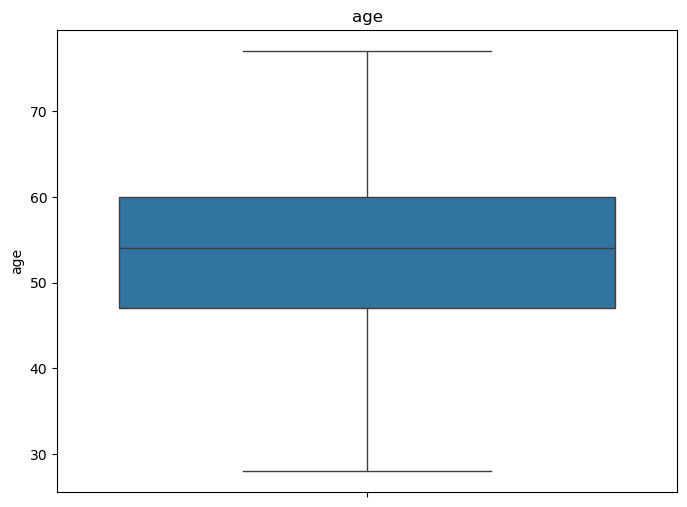

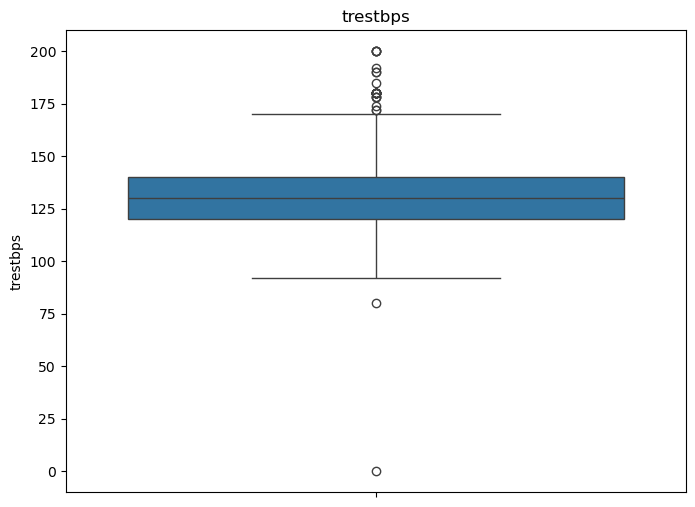

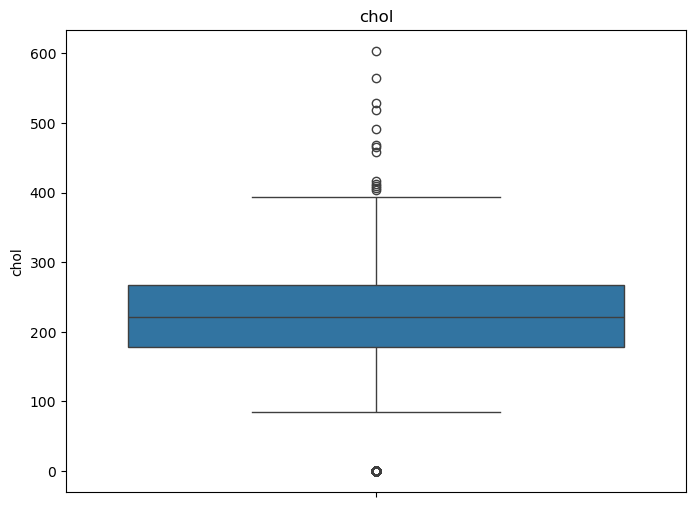

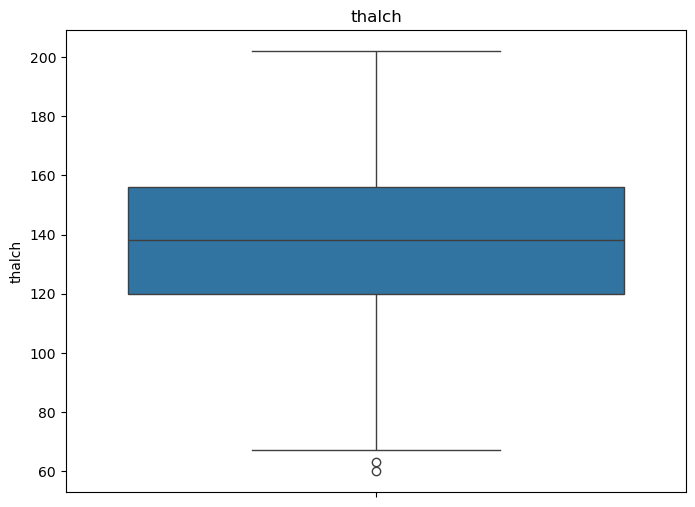

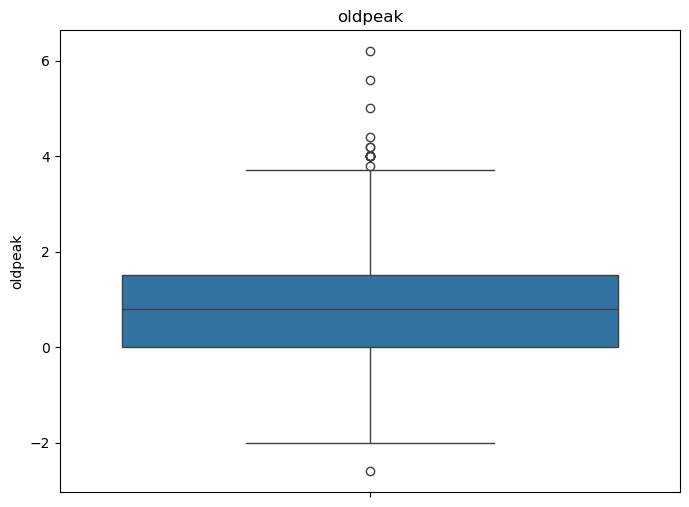

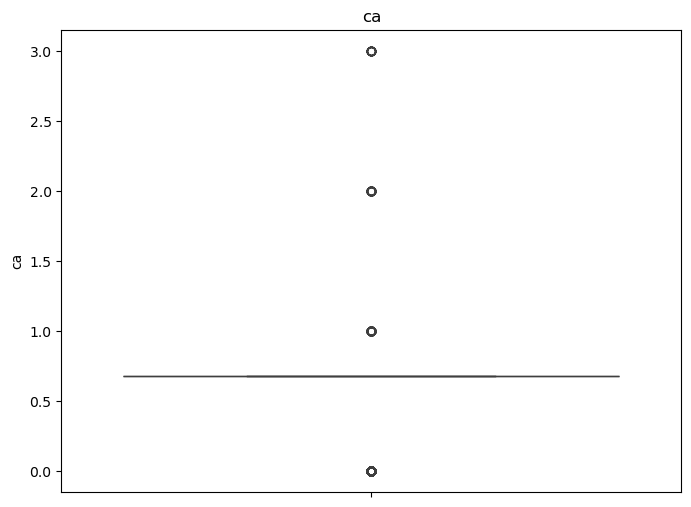

In [21]:
for col in col_name:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

Correlation with the Target:
id                   0.273552
age                  0.339596
trestbps             0.116225
chol                -0.228238
thalch              -0.351055
oldpeak              0.421907
ca                   0.321404
hospital_id          0.018041
age_outliers         0.320118
trestbps_outliers    0.100376
chol_outliers       -0.232244
thalch_outliers     -0.329088
oldpeak_outliers     0.431659
ca_outliers          0.516216
Name: num, dtype: float64



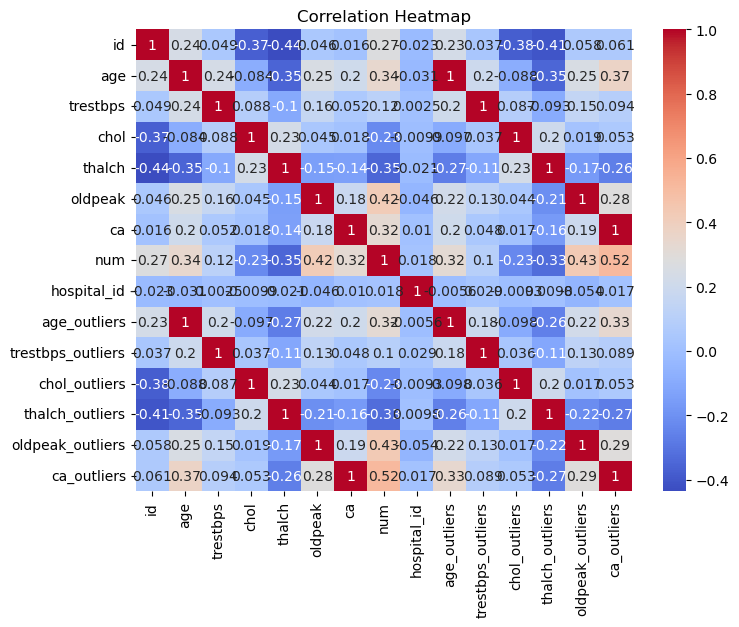

In [22]:
from sklearn.preprocessing import LabelEncoder

numeric_df=df.select_dtypes(include=np.number)

correlations= numeric_df.corr()['num'].drop('num')

print("Correlation with the Target:")

print(correlations)
print()

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df1 = df.copy()

label_encoder=LabelEncoder()
scaler=StandardScaler()

categorical_cols=['fbs','restecg','exang','slope','thal']
numeric_cols=['age','trestbps','chol','thalch','oldpeak','ca']

for col in categorical_cols:
    if col in df1.columns:
        df[col]=label_encoder.fit_transform(df[col].astype(str))

df1[numeric_cols]=df1[numeric_cols].fillna(df[numeric_cols].mean())
df1[numeric_cols]=scaler.fit_transform(df1[numeric_cols])

print("Processed Dataframe:")
print(df1.head())




Processed Dataframe:
   id       age     sex    dataset               cp  trestbps      chol  \
0   1  1.007386    Male  Cleveland   typical angina  0.698041  0.311021   
1   2  1.432034    Male  Cleveland     asymptomatic  1.511761  0.797713   
2   3  1.432034    Male  Cleveland     asymptomatic -0.658158  0.274289   
3   4 -1.752828    Male  Cleveland      non-anginal -0.115679  0.467130   
4   5 -1.328180  Female  Cleveland  atypical angina -0.115679  0.044717   

     fbs         restecg    thalch  ...        ca               thal num  \
0   True  lv hypertrophy  0.495698  ... -1.249371       fixed defect   0   
1  False  lv hypertrophy -1.175955  ...  4.292099             normal   2   
2  False  lv hypertrophy -0.340128  ...  2.444942  reversable defect   1   
3  False          normal  1.968345  ... -1.249371             normal   0   
4  False  lv hypertrophy  1.371326  ... -1.249371             normal   0   

   hospital_id age_outliers  trestbps_outliers  chol_outliers  \
0     